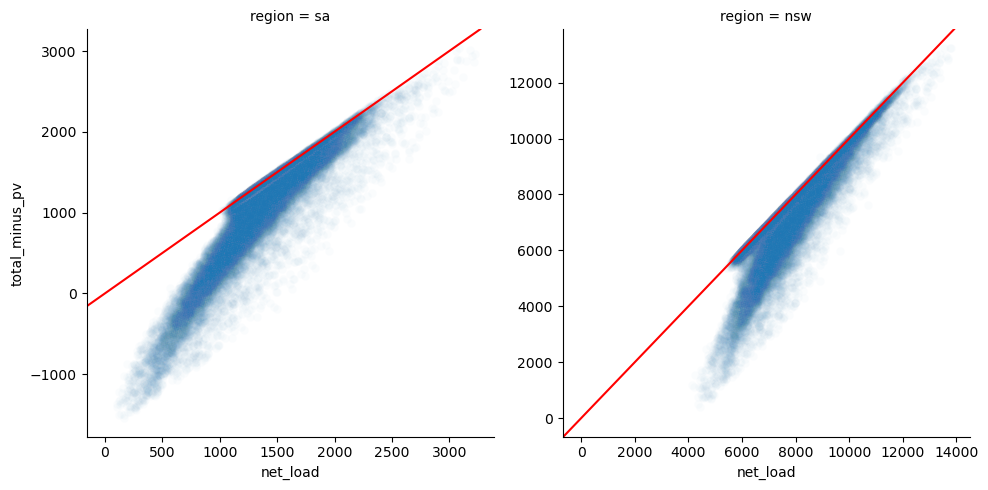

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sa = pd.read_csv('../data/sa/merged.csv').assign(region = 'sa')
nsw = pd.read_csv('../data/nsw/merged.csv').assign(region = 'nsw')
df = pd.concat([sa, nsw])

df['total_minus_pv'] = df['total_load'] - df['pv_est']

fg = sns.relplot(df, x='net_load', y='total_minus_pv', col='region', 
    alpha=0.02, facet_kws={'sharey':False, 'sharex':False})
for ax in fg.axes.flat:
    ax.axline(xy1=[0, 0], slope=1, color='red')

<Axes: xlabel='cloud8', ylabel='radkjm2'>

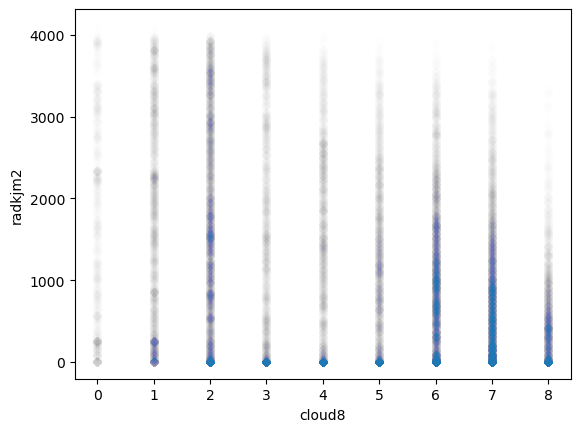

In [2]:
daydf = df[pd.to_datetime(df['datetime']).dt.hour.between(6, 19)]
sns.scatterplot(daydf, x='cloud8', y='radkjm2', alpha=0.005)

In [3]:
import numpy as np
daydf_naless = daydf[['radkjm2', 'cloud8']].dropna()
np.corrcoef(daydf_naless['radkjm2'], daydf_naless['cloud8'])

array([[ 1.        , -0.32855414],
       [-0.32855414,  1.        ]])

/var/folders/q1/x9cngnlj2pdglh47tvmrz2s40000gn/T/ipykernel_17926/191209795.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['pv_est'].plot()
/var/folders/q1/x9cngnlj2pdglh47tvmrz2s40000gn/T/ipykernel_17926/191209795.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['radkjm2'].plot()


<Axes: xlabel='hour'>

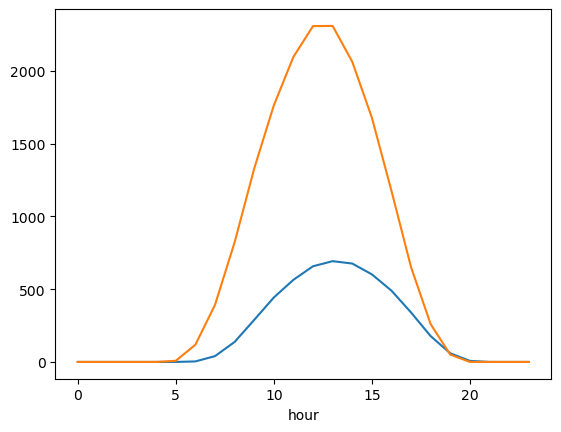

In [22]:
sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['pv_est'].plot()
sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['radkjm2'].plot()

In [21]:
pv_prof = sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['pv_est']
rad_prof = sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['radkjm2']
pd.concat([pv_prof, rad_prof], axis=1)

/var/folders/q1/x9cngnlj2pdglh47tvmrz2s40000gn/T/ipykernel_17926/4129439489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pv_prof = sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['pv_est']
/var/folders/q1/x9cngnlj2pdglh47tvmrz2s40000gn/T/ipykernel_17926/4129439489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rad_prof = sa.assign(hour = pd.to_datetime(sa['datetime']).dt.hour).groupby('hour').mean()['radkjm2']


,pv_est,radkjm2
hour,,
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,7.903667
6,3.406534,118.221128
7,39.896415,391.866448
8,137.201980,821.521620
